https://teratail.com/questions/149396

3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]
直線(1,2)-(8,7)


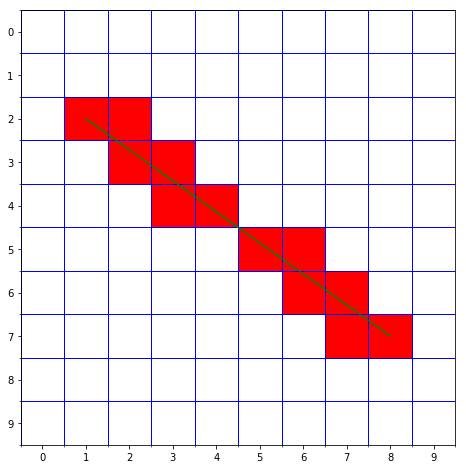

In [84]:
import sys
import numpy as np
print(sys.version)

class Point_():

    def __init__(self, x_init, y_init):
        self.x = x_init
        self.y = y_init


def chk(s, e, p):
    if s.x <= p.x and p.x <= e.x:
        if s.y <= e.y \
            and (s.y <= p.y and p.y <= e.y) \
            or s.y >= e.y \
            and (s.y >= p.y \
            and p.y >= e.y) \
        :
            a = e.y - s.y
            b = s.x - e.x
            c = s.x * (s.y - e.y) - s.y * (s.x - e.x)

            #以下判定条件式を追加改修
            chk = a * p.x + b * p.y + c
            
            len_x = e.x - s.x
            len_y = e.y - s.y
            if len_x == len_y:
                v = 0
            else:
                v = len_x // 2 + len_y // 2

            if  chk >= v * -1 and chk <= v:
                return True
            else:
                return False
            #追加改修以上

# 描画部分はtiitoiさんコードから引用しコードに合わせて改修
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def show_image(ax, img):
    ax.imshow(img, interpolation='none')
    ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
    # Major ticks
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_yticks(np.arange(0, 10, 1))
    # Labels for major ticks
    ax.set_xticklabels(np.arange(10))
    ax.set_yticklabels(np.arange(10))
    # Minor ticks
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)

def draw_line(img, p1, p2, color=[255, 0, 0]):
    x1, y1 = p1
    x2, y2 = p2

    slope = (y2 - y1) / (x2 - x1)

    xs = np.arange(x1, x2 + 1, 0.01)
    ys = y1 + slope * (xs - x1)
    pts = np.vstack([xs, ys]).T
    print(pts.shape)

    pts = np.ceil(pts).astype(int)  # 離散化する。
    pts = np.unique(pts, axis=0)  # 重複する点を削除

# 座標入力
s = Point_(1, 2)
e = Point_(8, 7)

print(f'直線({s.x},{s.y})-({e.x},{e.y})')
points = []
for p_x in range(s.x,e.x+1,1):
    for p_y in range(s.y,e.y+1,1):
        p = Point_(p_x, p_y)
        ret = chk(s,e,p)
        if ret:
            points.append([p_x,p_y])

points = np.array(points)            

# 白紙の画像を作成する。
img = np.full((10, 10, 3), 255, dtype=np.uint8)

for x, y in points:
    img[y, x] = [255, 0, 0]  # 赤

fig, ax = plt.subplots(figsize=(8, 8), facecolor='w')
ax.add_line(Line2D([s.x, e.x], [s.y, e.y], color='g'))
show_image(ax, img)
# plt.savefig('test.png')